In [1]:
import numpy as np
import pylab as plt
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

(35.0, 50.0)

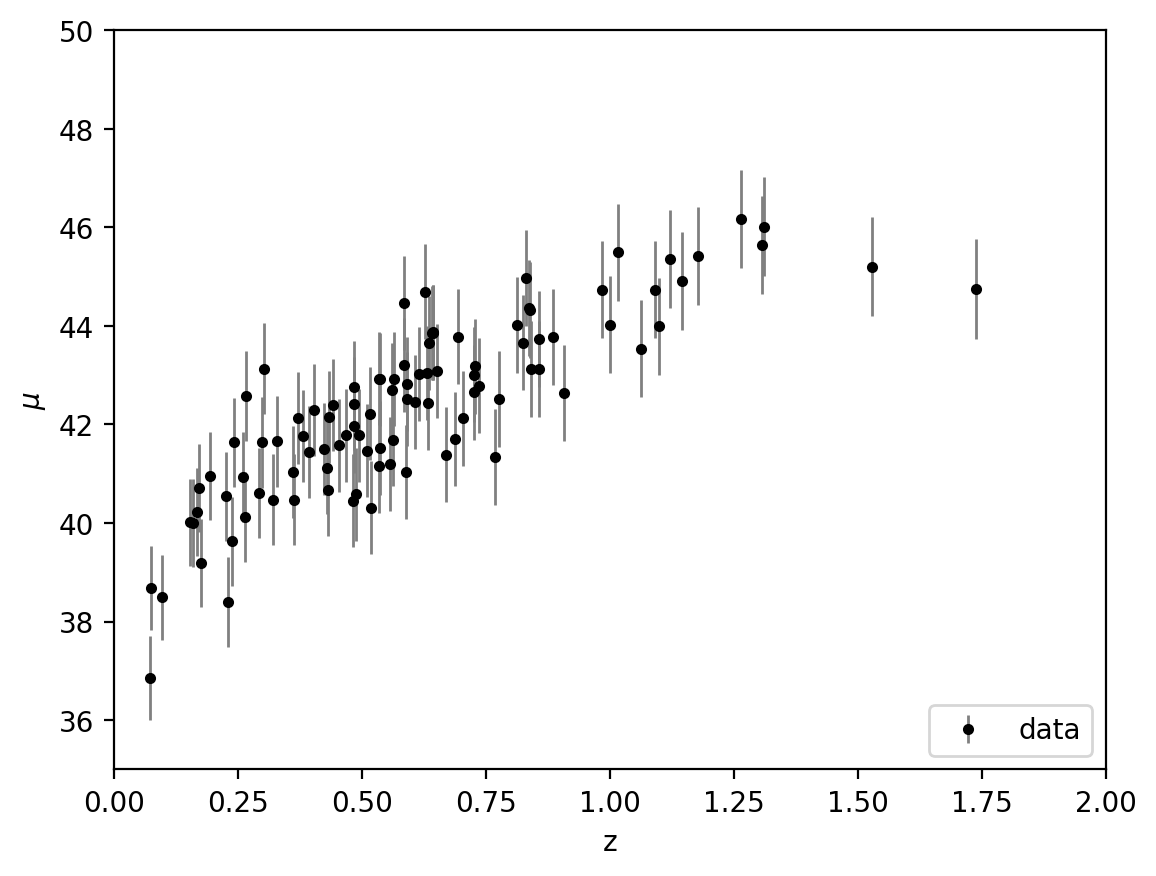

In [2]:
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
from scipy.optimize import fmin_cobyla

z_train, z_cv, mu_train, mu_cv = train_test_split(z_sample, mu_sample, test_size=0.3, random_state=42)

C:\Users\Admin\anaconda3\envs\pymc_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\pymc_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\pymc_env\Lib\site-packages\sklearn\gaussian_process\kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\p

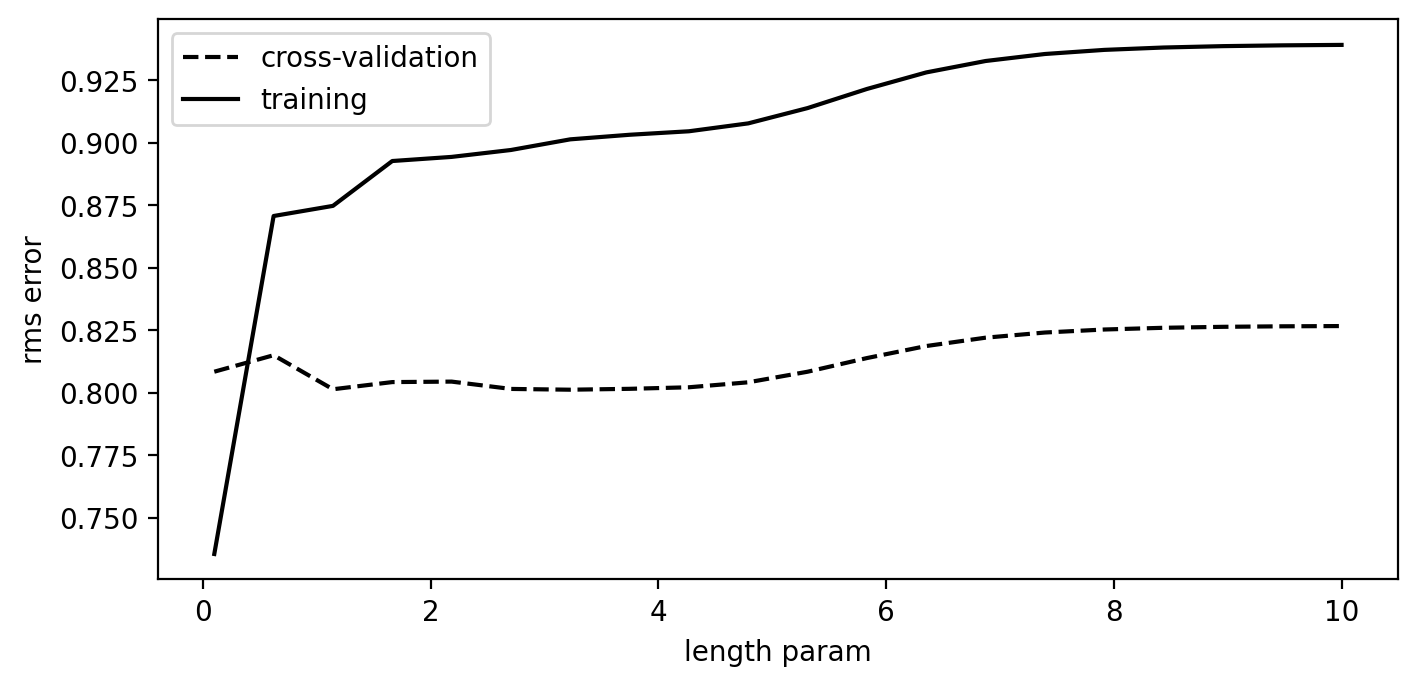

In [11]:
length = np.linspace(0.1, 10, 20)

training_err = np.zeros(length.shape)
crossval_err = np.zeros(length.shape)

fig = plt.figure(figsize=(8, 8))
for i, l in enumerate(length):


    kernel = 1.0 * kernels.RBF(l, 'fixed')
    gpr = GaussianProcessRegressor(kernel=kernel,
                               alpha=(dmu[0:len(mu_train)] / mu_train) ** 2, 
                               random_state=42)
    
    gpr.fit(z_train.reshape(-1,1),  mu_train)

    y_train = gpr.predict(z_train.reshape(-1,1))
    y_cv = gpr.predict(z_cv.reshape(-1,1))
    
    training_err[i] = np.sqrt(np.sum((mu_train - y_train) ** 2)  / len(mu_train))
    crossval_err[i] = np.sqrt(np.sum((mu_cv - y_cv) ** 2) / len(mu_cv))

ax = fig.add_subplot(211)
ax.plot(length, crossval_err, '--k', label='cross-validation')
ax.plot(length, training_err, '-k', label='training')

ax.set_xlabel('length param')
ax.set_ylabel('rms error')
ax.legend(loc=2)

plt.show()

best_l = length[np.argmin(crossval_err)]

In [14]:
x = np.linspace(0,2,100)

kernel = 1.0 * kernels.RBF(best_l, 'fixed')
gpr = GaussianProcessRegressor(kernel=kernel,
                               alpha=dmu**2, 
                               random_state=0)
gpr.fit(z_sample.reshape(-1,1), mu_sample)
f, f_err = gpr.predict(x.reshape(-1,1), 
                         return_std=True)

# we have fit for the `h` parameter: print the result here:
print("best-fit theta =", gpr.kernel_.theta[0])

best-fit theta = 6.600594430740001


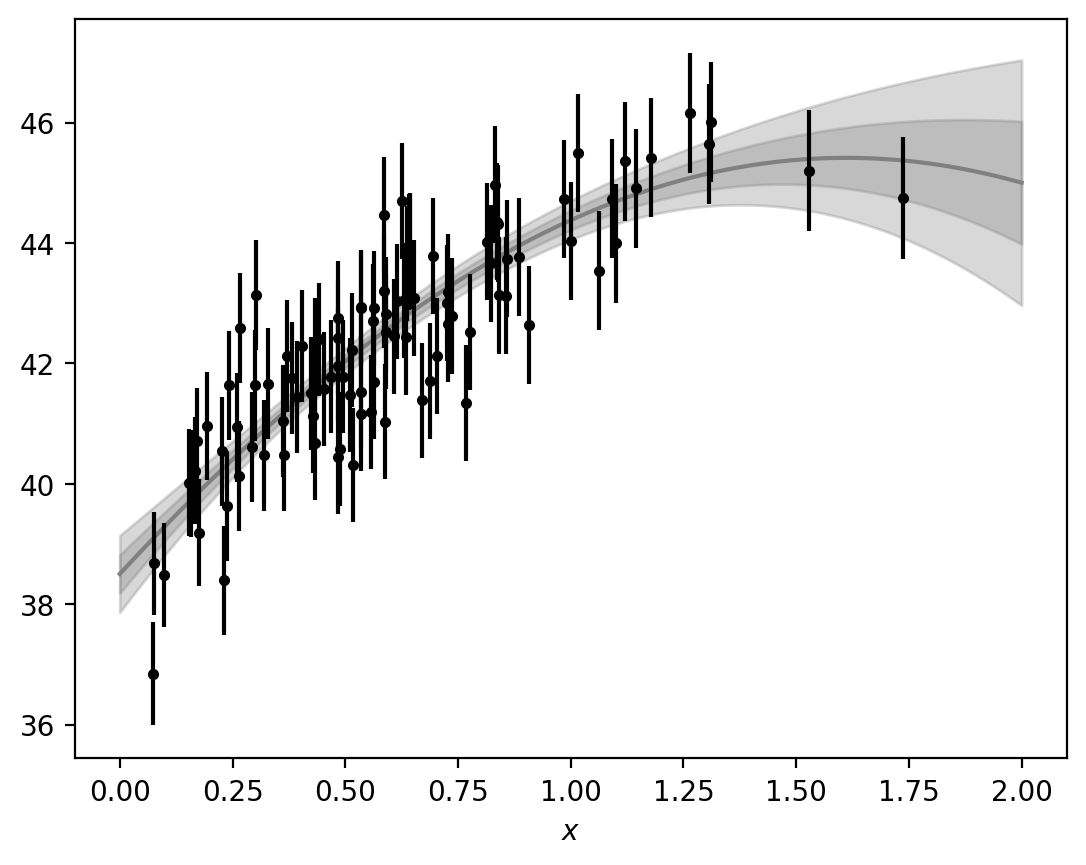

In [17]:
plt.plot(x, f, '-', color='gray')
plt.fill_between(x, f - 2 * f_err, f + 2 * f_err, 
                color='gray', alpha=0.3)

plt.fill_between(x, f - f_err, f + f_err, 
                color='gray', alpha=0.3)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ms=6)

plt.xlabel('$x$')

plt.show()